# Running BLAST through Biopython

In [166]:
from Bio.Blast.Applications import NcbiblastpCommandline as cline_blast
from Bio.Blast.Applications import NcbimakeblastdbCommandline as makeblastdb
import os
import pandas as pd

With this module, generating Blast commands is quite easy. To use the Blast databases such as `nr`, those have to be installed in the computer or server where we are running that. First, I will run Blast on two isolates of the same _Apilactobacillus kunkeei_ strain against each other. One of the isolates, `original`, is the original sequencing result for our strain, whereas the second, `new_isolate`, is a re-sequenced isolate of the same strain.

In [169]:
outfile = "strain_comparison.tab"
cline_input = cline_blast(cmd = "blastn", query = "fna/original.fna", subject = "fna/new_isolate.fna", remote = False, out = outfile, outfmt = 7)

This is how the command looks:

In [170]:
str(cline_input)

'blastn -out strain_comparison.tab -outfmt 7 -query fna/original.fna -subject fna/new_isolate.fna'

- The `blastn` command just tells us that we are using nucleotide sequences.
- The `-out` flag serves to specify the name of the output.
- `-outfmt` lets us specify the output format that we want (in this case, it is a table with some comments).
- `-query` sets the name of the file with the query sequence.
- Lastly, `-subject` sets the name of the file with the subject sequence (we blast the subject against the query).

To run the command, we can use `os.system`. With it, we can run the command from the shell.

In [171]:
os.system(str(cline_input));

Last, we can check the contents of the newly-created file (here I only print the first 10 lines):

In [192]:
i = 0
with open(outfile) as out:
    for line in out:
        print(line)
        i += 1
        #We can also use this loop to generate a list with the fields:
        if "Fields" in line:
            headers = line
        elif i > 10:
            break
            
header_list = headers.split(",") #Divide comma-separated fields
header_list[0] = header_list[0].replace("# Fields: ", "") #Remove start of line
header_list = [header.strip().strip("\n") for header in header_list] #Remove spaces and line breaks from beginning and end

# BLASTN 2.12.0+

# Query: OX335166.1 Apilactobacillus kunkeei strain H3B2-03M genome assembly, chromosome: 1

# Database: User specified sequence set (Input: fna/new_isolate.fna)

# Fields: query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score

# 622 hits found

OX335166.1	OX335140.1	99.997	1321651	21	14	1	1321649	1	1321631	0.0	2.440e+06

OX335166.1	OX335140.1	99.976	200531	46	2	1352179	1552708	1320200	1520729	0.0	3.700e+05

OX335166.1	OX335140.1	99.755	5308	11	2	1051463	1056769	443163	437857	0.0	9729

OX335166.1	OX335140.1	99.567	5310	13	2	437862	443170	1056752	1051452	0.0	9670

OX335166.1	OX335140.1	99.649	5129	17	1	379604	384732	683483	688610	0.0	9371

OX335166.1	OX335140.1	99.610	5129	19	1	683489	688616	379599	384727	0.0	9359



We got a total of 622 hits between the two strains! This is not unexpected, even though the genomes are small (~1.4 Mb). In fact, because they are isolates of the same strain, they should be identical.

We can also skip the lines that start with comments and parse the rest with `pandas`:

In [193]:
file_df = pd.read_csv(outfile, sep = "\t", skiprows = 5, header = None) #Read as tab-separated file, skip 5 rows and don't set the remaining rows as headers
file_df = file_df[:-1] #Remove the last row, that also contains a comment
file_df.columns = header_list #Add column names
display(file_df) #Show as table

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,OX335166.1,OX335140.1,99.997,1321651.0,21.0,14.0,1.0,1321649.0,1.0,1321631.0,0.000000,2440000.0
1,OX335166.1,OX335140.1,99.976,200531.0,46.0,2.0,1352179.0,1552708.0,1320200.0,1520729.0,0.000000,370000.0
2,OX335166.1,OX335140.1,99.755,5308.0,11.0,2.0,1051463.0,1056769.0,443163.0,437857.0,0.000000,9729.0
3,OX335166.1,OX335140.1,99.567,5310.0,13.0,2.0,437862.0,443170.0,1056752.0,1051452.0,0.000000,9670.0
4,OX335166.1,OX335140.1,99.649,5129.0,17.0,1.0,379604.0,384732.0,683483.0,688610.0,0.000000,9371.0
...,...,...,...,...,...,...,...,...,...,...,...,...
617,OX335166.1,OX335140.1,92.683,41.0,3.0,0.0,21941.0,21981.0,1346290.0,1346250.0,0.000002,60.2
618,OX335166.1,OX335140.1,92.500,40.0,3.0,0.0,695303.0,695342.0,399655.0,399694.0,0.000006,58.4
619,OX335166.1,OX335140.1,92.500,40.0,3.0,0.0,399660.0,399699.0,695297.0,695336.0,0.000006,58.4
620,OX335166.1,OX335140.1,100.000,30.0,0.0,0.0,181897.0,181926.0,176926.0,176955.0,0.000023,56.5


# Comparison visualization

We have already run the Blast, but it would be interesting to visualize these results and, for example, plot the comparison of the two genes or stretches of DNA. For this, we can use the library `pygenomeviz`. Here, we will try it on the example. Besides the comparison file, for better comparison we also need a GenBank file with the information about the **coding sequences (CDS)** in each genome.

In [249]:
from pygenomeviz import Genbank, GenomeViz

First we define some initial parameters, such as the start of the segment that we want to plot and the total size of said segment. We can also define some plotting parameters (`gv`).

In [250]:
path2gbks = "gbff" #Directory with input GenBank files
start = 1300000 #Start position in the genome of the segment to be plotted
seg_size = 110000 #Size of the segment to be plotted

#We initialize the gv object containing feature information with a few plotting parameters
gv = GenomeViz(
    feature_track_ratio = 0.3,
    tick_track_ratio = 0.5,
    tick_style = "axis",
)

Now we add all the CDS information to the tracks that will be printed:

In [251]:
#First, we loop through files in the gbff directory
for gbk_file in sorted(os.listdir(path2gbks)):
    #Read GenBank file with the Genbank function
    gbk = Genbank(f"{path2gbks}/{gbk_file}", min_range = start, max_range = start + seg_size)
    #Extract CDS information
    features = gbk.extract_features("CDS")
    #Define the region to be plotted
    track = gv.add_feature_track(gbk.name, size = gbk.range_size, start_pos = gbk.min_range)
    #Loop through CDS
    for cds in features:
        protstart = int(cds.location.start) #Get CDS start
        end = int(cds.location.end) #Get CDS end
        strand = cds.strand #Get strand
        if cds.qualifiers["product"] != ["hypothetical protein"] and "transposase" not in cds.qualifiers["product"][0]:
            gene_name = cds.qualifiers["gene"][0]
        else:
            gene_name = ""
        #This sets the CDS arrows and adds gene names
        track.add_feature(protstart, end, strand, label = gene_name, labelcolor = "black", labelsize = 12, facecolor = "skyblue", linewidth = 1, labelrotation = 45, labelvpos = "top", labelhpos = "center", labelha = "left", arrow_shaft_ratio = 1.0)
        track.set_sublabel(position = "bottom-left")

In [252]:
#Here I just took the dataframe that we generated earlier and modified the chromosome names
tab_df = file_df.copy()
tab_df = tab_df.replace("OX335140.1", "new_strain")
tab_df = tab_df.replace("OX335166.1", "original")
display(tab_df)

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,original,new_strain,99.997,1321651.0,21.0,14.0,1.0,1321649.0,1.0,1321631.0,0.000000,2440000.0
1,original,new_strain,99.976,200531.0,46.0,2.0,1352179.0,1552708.0,1320200.0,1520729.0,0.000000,370000.0
2,original,new_strain,99.755,5308.0,11.0,2.0,1051463.0,1056769.0,443163.0,437857.0,0.000000,9729.0
3,original,new_strain,99.567,5310.0,13.0,2.0,437862.0,443170.0,1056752.0,1051452.0,0.000000,9670.0
4,original,new_strain,99.649,5129.0,17.0,1.0,379604.0,384732.0,683483.0,688610.0,0.000000,9371.0
...,...,...,...,...,...,...,...,...,...,...,...,...
617,original,new_strain,92.683,41.0,3.0,0.0,21941.0,21981.0,1346290.0,1346250.0,0.000002,60.2
618,original,new_strain,92.500,40.0,3.0,0.0,695303.0,695342.0,399655.0,399694.0,0.000006,58.4
619,original,new_strain,92.500,40.0,3.0,0.0,399660.0,399699.0,695297.0,695336.0,0.000006,58.4
620,original,new_strain,100.000,30.0,0.0,0.0,181897.0,181926.0,176926.0,176955.0,0.000023,56.5


In [253]:
#Here I removed the matches that are outside the region that we want to plot
tab_df = tab_df.drop(tab_df[tab_df["q. end"] < start].index)
tab_df = tab_df.drop(tab_df[tab_df["s. end"] < start].index)
tab_df = tab_df.drop(tab_df[tab_df["q. start"] > start + seg_size].index)
tab_df = tab_df.drop(tab_df[tab_df["s. start"] > start + seg_size].index)
display(tab_df)

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,original,new_strain,99.997,1321651.0,21.0,14.0,1.0,1321649.0,1.0,1321631.0,0.000000e+00,2440000.0
1,original,new_strain,99.976,200531.0,46.0,2.0,1352179.0,1552708.0,1320200.0,1520729.0,0.000000e+00,370000.0
87,original,new_strain,99.655,1449.0,3.0,2.0,1385163.0,1386610.0,1373594.0,1375041.0,0.000000e+00,2647.0
143,original,new_strain,99.517,1450.0,3.0,4.0,1405573.0,1407020.0,1353184.0,1354631.0,0.000000e+00,2636.0
209,original,new_strain,99.651,1434.0,5.0,0.0,1352178.0,1353611.0,1375028.0,1373595.0,0.000000e+00,2621.0
227,original,new_strain,99.582,1434.0,4.0,2.0,1352179.0,1353611.0,1354617.0,1353185.0,0.000000e+00,2614.0
327,original,new_strain,98.422,1458.0,19.0,3.0,1385160.0,1386613.0,1349482.0,1350939.0,0.000000e+00,2562.0
331,original,new_strain,97.973,1480.0,21.0,9.0,1405546.0,1407021.0,1349462.0,1350936.0,0.000000e+00,2558.0
332,original,new_strain,97.973,1480.0,21.0,9.0,1381441.0,1382915.0,1373567.0,1375042.0,0.000000e+00,2558.0
337,original,new_strain,98.286,1459.0,19.0,5.0,1381461.0,1382918.0,1353181.0,1354634.0,0.000000e+00,2551.0


In [254]:
#Now, we need to set all the starts below the minimum to the minimum
tab_df["q. start"][tab_df["q. start"] < start] = start
tab_df["q. end"][tab_df["q. end"] > start + seg_size] = start + seg_size
tab_df["s. start"][tab_df["s. start"] < start] = start
tab_df["s. end"][tab_df["s. end"] > start + seg_size] = start + seg_size

#We need to reset the index so that we can loop through the rows
tab_df = tab_df.reset_index()
display(tab_df)

,index,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,0,original,new_strain,99.997,1321651.0,21.0,14.0,1300000.0,1321649.0,1300000.0,1321631.0,0.000000e+00,2440000.0
1,1,original,new_strain,99.976,200531.0,46.0,2.0,1352179.0,1410000.0,1320200.0,1410000.0,0.000000e+00,370000.0
2,87,original,new_strain,99.655,1449.0,3.0,2.0,1385163.0,1386610.0,1373594.0,1375041.0,0.000000e+00,2647.0
3,143,original,new_strain,99.517,1450.0,3.0,4.0,1405573.0,1407020.0,1353184.0,1354631.0,0.000000e+00,2636.0
4,209,original,new_strain,99.651,1434.0,5.0,0.0,1352178.0,1353611.0,1375028.0,1373595.0,0.000000e+00,2621.0
5,227,original,new_strain,99.582,1434.0,4.0,2.0,1352179.0,1353611.0,1354617.0,1353185.0,0.000000e+00,2614.0
6,327,original,new_strain,98.422,1458.0,19.0,3.0,1385160.0,1386613.0,1349482.0,1350939.0,0.000000e+00,2562.0
7,331,original,new_strain,97.973,1480.0,21.0,9.0,1405546.0,1407021.0,1349462.0,1350936.0,0.000000e+00,2558.0
8,332,original,new_strain,97.973,1480.0,21.0,9.0,1381441.0,1382915.0,1373567.0,1375042.0,0.000000e+00,2558.0
9,337,original,new_strain,98.286,1459.0,19.0,5.0,1381461.0,1382918.0,1353181.0,1354634.0,0.000000e+00,2551.0


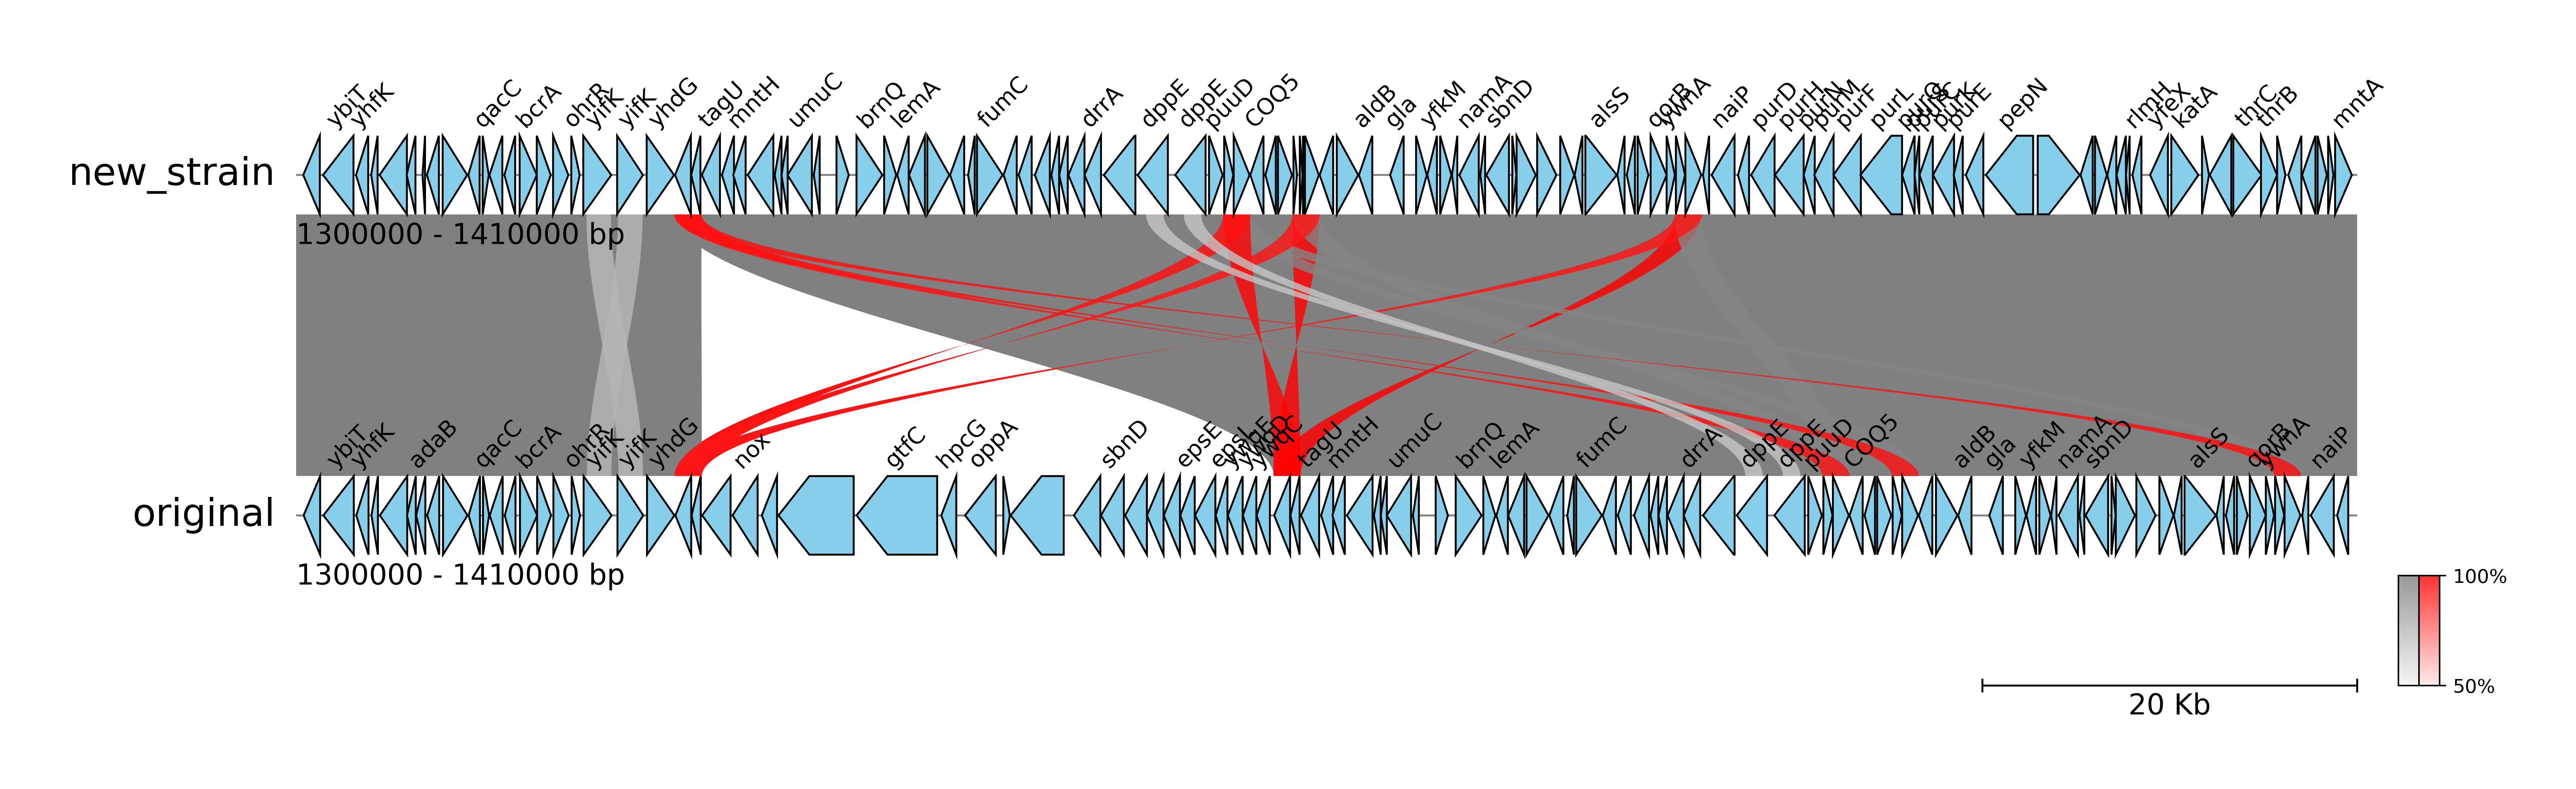

In [258]:
#Here we loop through the info in the dataframe and we plot the different matches (links) between the sequences
min_id = 50 #We set a minimum percentage of identity to adjust the colors
for i in range(len(tab_df)):
    #We define the links
    link1 = (tab_df.loc[i, "query acc.ver"], tab_df.loc[i, "q. start"], tab_df.loc[i, "q. end"])
    link2 = (tab_df.loc[i, "subject acc.ver"], tab_df.loc[i, "s. start"], tab_df.loc[i, "s. end"])
    #We define the percentage of identity (important to color the links)
    identity = tab_df.loc[i, "% identity"]
    #Here we add the links to the gv plot
    gv.add_link(link1, link2, v = identity, vmin = min_id, curve = True)
    gv.tick_style = "bar" #This adds the scale of the plot (20 Kb)
    
fig = gv.plotfig(400) #We plot the figure
gv.set_colorbar(fig, vmin = min_id) #We add a color bar to interpret the colors